<a href="https://colab.research.google.com/github/polarpolar914/MachineLearning-for-AI/blob/main/week5/4-time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Time Series Data

## About the Data
In this notebook, we will be working with 5 datasets:
- (CSV) Facebook's stock price daily throughout 2018 (obtained using the [`stock_analysis` package](https://github.com/stefmolin/stock-analysis)).
- (CSV) Facebook's OHLC stock data from May 20, 2019 - May 24, 2019 per minute from [Nasdaq.com](https://old.nasdaq.com/symbol/fb/interactive-chart).
- (CSV) melted stock data for Facebook from May 20, 2019 - May 24, 2019 per minute from [Nasdaq.com](https://old.nasdaq.com/symbol/fb/interactive-chart).
- (DB) stock opening prices by the minute for Apple from May 20, 2019 - May 24, 2019 altered to have seconds in the time from [Nasdaq.com](https://old.nasdaq.com/symbol/aapl/interactive-chart).
- (DB) stock opening prices by the minute for Facebook from May 20, 2019 - May 24, 2019 from [Nasdaq.com](https://old.nasdaq.com/symbol/fb/interactive-chart).

## Setup

In [1]:
!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/dirty_data.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/fb_2018.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/fb_week_of_may_20_per_minute.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/melted_stock_data.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/nyc_weather_2018.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/stocks.db

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/weather.db

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/weather_by_station.csv

!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/weather_stations.csv

!mkdir data

!mv *.* data

--2024-10-01 07:53:20--  https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/dirty_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46422 (45K) [text/plain]
Saving to: ‘dirty_data.csv’

dirty_data.csv      100%[===================>]  45.33K  --.-KB/s    in 0.01s   

2024-10-01 07:53:20 (3.93 MB/s) - ‘dirty_data.csv’ saved [46422/46422]

--2024-10-01 07:53:20--  https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_04/data/fb_2018.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conn

In [2]:
import numpy as np
import pandas as pd

fb = pd.read_csv('data/fb_2018.csv', index_col='date', parse_dates=True).assign(
    trading_volume=lambda x: pd.cut(x.volume, bins=3, labels=['low', 'med', 'high'])
)
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low
2018-01-08,187.20,188.90,186.3300,188.28,17994726,low


## Time-based selection and filtering
Remember, when we have an index of type `DatetimeIndex`, we can use datetime slicing. We can provide a range of dates. We only get three days back because the stock market is closed on the weekends:

In [3]:
fb['2018-10-11':'2018-10-15']

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-10-11,150.13,154.81,149.1600,153.35,35338901,low
2018-10-12,156.73,156.89,151.2998,153.74,25293492,low
2018-10-15,153.32,155.57,152.5500,153.52,15433521,low


We can select ranges of months and quarters:

In [4]:
fb.loc['2018-q1'].equals(fb['2018-01':'2018-03'])

True

The `first()` method will give us a specified length of time from the beginning of the time series. Here, we ask for a week. January 1, 2018 was a holiday—meaning the market was closed. It was also a Monday, so the week here is only four days:

In [5]:
fb.first('1W')

<ipython-input-5-db06dd381446>:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.first('1W')


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low


The `last()` method will take from the end:

In [6]:
fb.last('1W')

<ipython-input-6-72731dd004c8>:1: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.last('1W')


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-12-31,134.45,134.64,129.95,131.09,24625308,low


Suppose that we reindexed the Facebook stock data to include all dates for 2018. We would have null entries for January 1st:

In [7]:
fb_reindexed = fb.reindex(pd.date_range('2018-01-01', '2018-12-31', freq='D'))
fb_reindexed.first('1D').isna().squeeze().all()

<ipython-input-7-8c45c3d6ed22>:2: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb_reindexed.first('1D').isna().squeeze().all()


True

We can use `first_valid_index()` to give us the index of the first non-null entry in our data, which is the first day the market was open in Q1 2018:

In [8]:
fb_reindexed.loc['2018-Q1'].first_valid_index()

Timestamp('2018-01-02 00:00:00')

Conversely, we can use `last_valid_index()` to get the last entry of non-null data. For Q1 2018, this is March 29th:

In [9]:
fb_reindexed.loc['2018-Q1'].last_valid_index()

Timestamp('2018-03-29 00:00:00')

We can use `asof()` to find the last non-null data before the point we are looking for. If we ask for March 31st, we will get the data from the index we got from `fb_reindexed.loc['2018-Q1'].last_valid_index()`, which was March 29th. Note that this works regardless of whether we reindexed:

In [10]:
fb_reindexed.asof('2018-03-31')

,2018-03-31
open,155.15
high,161.42
low,154.14
close,159.79
volume,59434293.0
trading_volume,low


For the next few examples, we need datetimes, so we will read in the stock data per minute file:

In [11]:
stock_data_per_minute = pd.read_csv(
    'data/fb_week_of_may_20_per_minute.csv', index_col='date', parse_dates=True,
    date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H-%M')
)

stock_data_per_minute.head()

<ipython-input-11-16d6e814d653>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  stock_data_per_minute = pd.read_csv(


,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.6200,181.6200,181.6200,181.6200,159049.0
2019-05-20 09:31:00,182.6100,182.6100,182.6100,182.6100,468017.0
2019-05-20 09:32:00,182.7458,182.7458,182.7458,182.7458,97258.0
2019-05-20 09:33:00,182.9500,182.9500,182.9500,182.9500,43961.0
2019-05-20 09:34:00,183.0600,183.0600,183.0600,183.0600,79562.0


We can use a `Grouper` object to roll up our data to the daily level along with `first` and `last`:

In [12]:
stock_data_per_minute.groupby(pd.Grouper(freq='1D')).agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.1800,181.6200,182.72,10044838.0
2019-05-21,184.53,185.5800,183.9700,184.82,7198405.0
2019-05-22,184.81,186.5603,184.0120,185.32,8412433.0
2019-05-23,182.50,183.7300,179.7559,180.87,12479171.0
2019-05-24,182.33,183.5227,181.0400,181.06,7686030.0


The `at_time()` method allows us to pull out all datetimes that match a certain time. Here, we can grab all the rows from the time the stock market opens (9:30 AM):

In [13]:
stock_data_per_minute.at_time('9:30')

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.62,181.62,181.62,181.62,159049.0
2019-05-21 09:30:00,184.53,184.53,184.53,184.53,58171.0
2019-05-22 09:30:00,184.81,184.81,184.81,184.81,41585.0
2019-05-23 09:30:00,182.50,182.50,182.50,182.50,121930.0
2019-05-24 09:30:00,182.33,182.33,182.33,182.33,52681.0


We can use `between_time()` to grab data for the last two minutes of trading daily:

In [14]:
stock_data_per_minute.between_time('15:59', '16:00')

,open,high,low,close,volume
date,,,,,
2019-05-20 15:59:00,182.915,182.915,182.915,182.915,134569.0
2019-05-20 16:00:00,182.720,182.720,182.720,182.720,1113672.0
2019-05-21 15:59:00,184.840,184.840,184.840,184.840,61606.0
2019-05-21 16:00:00,184.820,184.820,184.820,184.820,801080.0
2019-05-22 15:59:00,185.290,185.290,185.290,185.290,96099.0
2019-05-22 16:00:00,185.320,185.320,185.320,185.320,1220993.0
2019-05-23 15:59:00,180.720,180.720,180.720,180.720,109648.0
2019-05-23 16:00:00,180.870,180.870,180.870,180.870,1329217.0
2019-05-24 15:59:00,181.070,181.070,181.070,181.070,52994.0


On average, are more shares traded within the first 30 minutes of trading or in the last 30 minutes? We can combine `between_time()` with `group_by()` and `filter()` from the [`3-aggregations.ipynb`](./3-aggregations.ipynb) notebook to answer this question. For the week in question, more are traded on average around opening time than closing time:

In [15]:
shares_traded_in_first_30_min = stock_data_per_minute\
    .between_time('9:30', '10:00')\
    .groupby(pd.Grouper(freq='1D'))\
    .filter(lambda x: (x.volume > 0).all())\
    .volume.mean()

shares_traded_in_last_30_min = stock_data_per_minute\
    .between_time('15:30', '16:00')\
    .groupby(pd.Grouper(freq='1D'))\
    .filter(lambda x: (x.volume > 0).all())\
    .volume.mean()

shares_traded_in_first_30_min - shares_traded_in_last_30_min

18592.967741935485

In cases where time doesn't matter, we can normalize the times to midnight:

In [16]:
pd.DataFrame(
    dict(before=stock_data_per_minute.index, after=stock_data_per_minute.index.normalize())
).head()

,before,after
0,2019-05-20 09:30:00,2019-05-20
1,2019-05-20 09:31:00,2019-05-20
2,2019-05-20 09:32:00,2019-05-20
3,2019-05-20 09:33:00,2019-05-20
4,2019-05-20 09:34:00,2019-05-20


Note that we can also use `normalize()` on a `Series` object after accessing the `dt` attribute:

In [17]:
stock_data_per_minute.index.to_series().dt.normalize().head()

,date
date,
2019-05-20 09:30:00,2019-05-20
2019-05-20 09:31:00,2019-05-20
2019-05-20 09:32:00,2019-05-20
2019-05-20 09:33:00,2019-05-20
2019-05-20 09:34:00,2019-05-20


## Shifting for lagged data
We can use `shift()` to create lagged data. By default, the shift will be one period. For example, we can use `shift()` to create a new column that indicates the previous day's closing price. From this new column, we can calculate the price change due to after-hours trading (after the close one day right up to the open the following day):

In [18]:
fb.assign(
    prior_close=lambda x: x.close.shift(),
    after_hours_change_in_price=lambda x: x.open - x.prior_close,
    abs_change=lambda x: x.after_hours_change_in_price.abs()
).nlargest(5, 'abs_change')

,open,high,low,close,volume,trading_volume,prior_close,after_hours_change_in_price,abs_change
date,,,,,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668,high,217.50,-42.61,42.61
2018-04-26,173.22,176.27,170.80,174.16,77556934,med,159.69,13.53,13.53
2018-01-12,178.06,181.48,177.40,179.37,77551299,med,187.77,-9.71,9.71
2018-10-31,155.00,156.40,148.96,151.79,60101251,low,146.22,8.78,8.78
2018-03-19,177.01,177.17,170.06,172.56,88140060,med,185.09,-8.08,8.08


If the goal is to to add/subtract time, we can use `pd.Timedelta` objects instead:

In [19]:
pd.date_range('2018-01-01', freq='D', periods=5) + pd.Timedelta('9 hours 30 minutes')

DatetimeIndex(['2018-01-01 09:30:00', '2018-01-02 09:30:00',
               '2018-01-03 09:30:00', '2018-01-04 09:30:00',
               '2018-01-05 09:30:00'],
              dtype='datetime64[ns]', freq='D')

## Differenced data
Using the `diff()` method is a quick way to calculate the difference between the data and a lagged version of itself. By default, it will yield the result of `data - data.shift()`:

In [20]:
(
    fb.drop(columns='trading_volume')
    - fb.drop(columns='trading_volume').shift()
).equals(
    fb.drop(columns='trading_volume').diff()
)

True

We can use this to see how Facebook stock changed day-over-day:

In [21]:
fb.drop(columns='trading_volume').diff().head()

,open,high,low,close,volume
date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,4.20,3.20,3.7800,3.25,-1265340.0
2018-01-04,3.02,1.43,2.7696,-0.34,-3005667.0
2018-01-05,0.69,0.69,0.8304,2.52,-306361.0
2018-01-08,1.61,2.00,1.4000,1.43,4420191.0


We can specify the number of periods, can be any positive or negative integer:

In [22]:
fb.drop(columns='trading_volume').diff(-3).head()

,open,high,low,close,volume
date,,,,,
2018-01-02,-7.91,-5.32,-7.3800,-5.43,4577368.0
2018-01-03,-5.32,-4.12,-5.0000,-3.61,-1108163.0
2018-01-04,-3.80,-2.59,-3.0004,-3.54,1487839.0
2018-01-05,-1.35,-0.99,-0.7000,-0.99,3044641.0
2018-01-08,-1.20,0.50,-1.0500,0.51,8406139.0


## Resampling
Sometimes the data is at a granularity that isn't conducive to our analysis. Consider the case where we have data per minute for the full year of 2018. Let's see what happens if we try to plot this, and then look at the daily aggregation of this data.

*Plotting will be covered next chapter.*

In [23]:
!git clone https://github.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition.git && pip3 install /content/Hands-On-Data-Analysis-with-Pandas-2nd-edition/visual-aids/

Cloning into 'Hands-On-Data-Analysis-with-Pandas-2nd-edition'...
remote: Enumerating objects: 3428, done.
remote: Counting objects: 100% (398/398), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 3428 (delta 348), reused 343 (delta 336), pack-reused 3030 (from 1)
Receiving objects: 100% (3428/3428), 75.18 MiB | 8.38 MiB/s, done.
Resolving deltas: 100% (2135/2135), done.
Processing ./Hands-On-Data-Analysis-with-Pandas-2nd-edition/visual-aids
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/stefmolin/stock-analysis.git (to revision 2nd_edition) to /tmp/pip-install-t3dinxi5/stock-analysis_f25f7b3ea55843f0a7ce30c32aaafcc2
  Running command git clone --filter=blob:none --quiet https://github.com/stefmolin/stock-analysis.git /tmp/pip-install-t3dinxi5/stock-analysis_f25f7b3ea55843f0a7ce30c32aaafcc2
  Running command git checkout -q a85af035178626c655d1ba04fd51ff6a4461a113
  Resolved https://github.com/stefmolin/stock-analysis.git to commit a85af035178

array([<Axes: title={'center': 'raw data'}, xlabel='date', ylabel='events'>,
       <Axes: title={'center': 'daily totals'}, xlabel='date', ylabel='events'>],
      dtype=object)

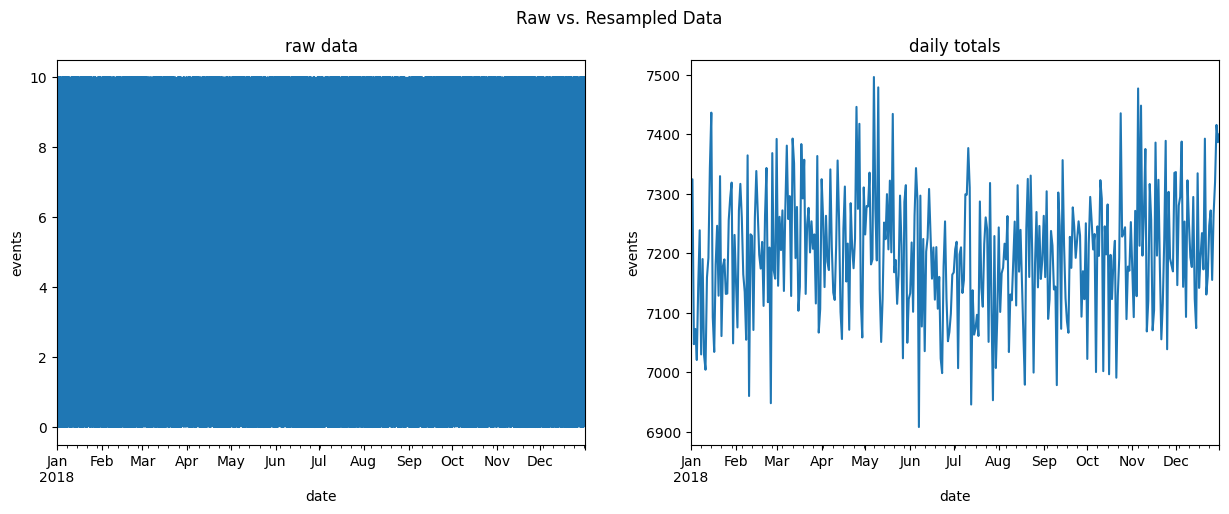

In [24]:
from visual_aids.misc_viz import resampling_example
resampling_example()

The plot on the left has so much data we can't see anything. However, when we aggregate to the daily totals, we see the data. We can alter the granularity of the data we are working with using resampling. Recall our minute-by-minute stock data:

In [25]:
stock_data_per_minute.head()

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.6200,181.6200,181.6200,181.6200,159049.0
2019-05-20 09:31:00,182.6100,182.6100,182.6100,182.6100,468017.0
2019-05-20 09:32:00,182.7458,182.7458,182.7458,182.7458,97258.0
2019-05-20 09:33:00,182.9500,182.9500,182.9500,182.9500,43961.0
2019-05-20 09:34:00,183.0600,183.0600,183.0600,183.0600,79562.0


We can resample this to get to a daily frequency:

In [26]:
stock_data_per_minute.resample('1D').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.1800,181.6200,182.72,10044838.0
2019-05-21,184.53,185.5800,183.9700,184.82,7198405.0
2019-05-22,184.81,186.5603,184.0120,185.32,8412433.0
2019-05-23,182.50,183.7300,179.7559,180.87,12479171.0
2019-05-24,182.33,183.5227,181.0400,181.06,7686030.0


In [33]:
#fb.resample('Q').mean()
fb.resample('Q').agg({
    'open': 'mean',
    'high': 'mean',
    'low': 'mean',
    'close': 'mean',
    'volume': 'sum'
})

,open,high,low,close,volume
date,,,,,
2018-03-31,179.472295,181.794659,177.040428,179.551148,2008510199
2018-06-30,180.373770,182.277689,178.595964,180.704688,1539540336
2018-09-30,180.812130,182.890886,178.955229,181.028492,1702248960
2018-12-31,145.272460,147.620121,142.718943,144.868730,1699382899


We can also use `apply()`. Here, we show the quarterly change from start to end:

In [34]:
fb.drop(columns='trading_volume').resample('Q').apply(
    lambda x: x.last('1D').values - x.first('1D').values
)

<ipython-input-34-fe46371760dd>:2: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  lambda x: x.last('1D').values - x.first('1D').values
<ipython-input-34-fe46371760dd>:2: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  lambda x: x.last('1D').values - x.first('1D').values


,0
date,
2018-03-31,"[[-22.53, -20.160000000000025, -23.41000000000..."
2018-06-30,"[[39.50999999999999, 38.399700000000024, 39.84..."
2018-09-30,"[[-25.039999999999992, -28.659999999999997, -2..."
2018-12-31,"[[-28.580000000000013, -31.24000000000001, -31..."


Consider the following melted stock data by the minute. We don't see the OHLC data directly:

In [35]:
melted_stock_data = pd.read_csv('data/melted_stock_data.csv', index_col='date', parse_dates=True)
melted_stock_data.head()

,price
date,
2019-05-20 09:30:00,181.6200
2019-05-20 09:31:00,182.6100
2019-05-20 09:32:00,182.7458
2019-05-20 09:33:00,182.9500
2019-05-20 09:34:00,183.0600


We can use the `ohlc()` method after resampling to recover the OHLC columns:

In [36]:
melted_stock_data.resample('1D').ohlc()['price']

,open,high,low,close
date,,,,
2019-05-20,181.62,184.1800,181.6200,182.72
2019-05-21,184.53,185.5800,183.9700,184.82
2019-05-22,184.81,186.5603,184.0120,185.32
2019-05-23,182.50,183.7300,179.7559,180.87
2019-05-24,182.33,183.5227,181.0400,181.06


Alternatively, we can upsample to increase the granularity. Note this will introduce `NaN` values:

In [37]:
fb.resample('6H').asfreq().head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903.0,low
2018-01-02 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563.0,low


There are many ways to handle these `NaN` values. We can forward-fill with `pad()`:

In [43]:
#fb.resample('6H').pad().head()
fb.resample('6H').ffill().head()
'''
pad()는 실제로는 앞의 값으로 결측치를 채우는 작업을 하는 것이므로, fillna(method='pad')를 사용하면 동일한 결과를 얻을 수 있습니다. 리샘플링 후 결측값이 발생할 때, fillna() 메서드를 사용해 이전 값을 앞으로 채울 수 있습니다.
'''

"\npad()는 실제로는 앞의 값으로 결측치를 채우는 작업을 하는 것이므로, fillna(method='pad')를 사용하면 동일한 결과를 얻을 수 있습니다. 리샘플링 후 결측값이 발생할 때, fillna() 메서드를 사용해 이전 값을 앞으로 채울 수 있습니다.\n"

We can specify a specific value or a method with `fillna()`:

In [44]:
fb.resample('6H').fillna('nearest').head()

<ipython-input-44-4095d4d2ef89>:1: FutureWarning: DatetimeIndexResampler.fillna is deprecated and will be removed in a future version. Use obj.ffill(), obj.bfill(), or obj.nearest() instead.
  fb.resample('6H').fillna('nearest').head()


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-02 06:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-02 12:00:00,181.88,184.78,181.33,184.67,16886563,low
2018-01-02 18:00:00,181.88,184.78,181.33,184.67,16886563,low
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563,low


We can use `asfreq()` and `assign()` to specify the action per column:

In [45]:
fb.resample('6H').asfreq().assign(
    volume=lambda x: x.volume.fillna(0), # put 0 when market is closed
    close=lambda x: x.close.fillna(method='ffill'), # carry forward
    # take the closing price if these aren't available
    open=lambda x: x.open.combine_first(x.close),
    high=lambda x: x.high.combine_first(x.close),
    low=lambda x: x.low.combine_first(x.close)
).head()

<ipython-input-45-1a850489c95f>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close=lambda x: x.close.fillna(method='ffill'), # carry forward


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903.0,low
2018-01-02 06:00:00,181.42,181.42,181.42,181.42,0.0,NaN
2018-01-02 12:00:00,181.42,181.42,181.42,181.42,0.0,NaN
2018-01-02 18:00:00,181.42,181.42,181.42,181.42,0.0,NaN
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563.0,low


## Merging
We saw merging examples the [`1-querying_and_merging.ipynb`](./1-querying_and_merging.ipynb) notebook. However, they all matched based on keys. With time series, it is possible that they are so granular that we never have the same time for multiple entries. Let's work with some stock data at different granularities:

In [46]:
import sqlite3

with sqlite3.connect('data/stocks.db') as connection:
    fb_prices = pd.read_sql(
        'SELECT * FROM fb_prices', connection,
        index_col='date', parse_dates=['date']
    )
    aapl_prices = pd.read_sql(
        'SELECT * FROM aapl_prices', connection,
        index_col='date', parse_dates=['date']
    )

The Facebook prices are at the minute granularity:

In [47]:
fb_prices.index.second.unique()

Index([0], dtype='int32', name='date')

However, the Apple prices have information for the second:

In [48]:
aapl_prices.index.second.unique()

Index([ 0, 52, 36, 34, 55, 35,  7, 12, 59, 17,  5, 20, 26, 23, 54, 49, 19, 53,
       11, 22, 13, 21, 10, 46, 42, 38, 33, 18, 16,  9, 56, 39,  2, 50, 31, 58,
       48, 24, 29,  6, 47, 51, 40,  3, 15, 14, 25,  4, 43,  8, 32, 27, 30, 45,
        1, 44, 57, 41, 37, 28],
      dtype='int32', name='date')

We can perform an *as of* merge to try to line these up the best we can. We specify how to handle the mismatch with the `direction` and `tolerance` parameters. We will fill in with the `direction` of `nearest` and a `tolerance` of 30 seconds. This will place the Apple data with the minute that it is closest to, so 9:31:52 will go with 9:32 and 9:37:07 will go with 9:37. Since the times are on the index, we pass in `left_index` and `right_index`, as we did with `merge()` earlier this chapter:

In [49]:
pd.merge_asof(
    fb_prices, aapl_prices,
    left_index=True, right_index=True, # datetimes are in the index
    # merge with nearest minute
    direction='nearest', tolerance=pd.Timedelta(30, unit='s')
).head()

,FB,AAPL
date,,
2019-05-20 09:30:00,181.6200,183.5200
2019-05-20 09:31:00,182.6100,NaN
2019-05-20 09:32:00,182.7458,182.8710
2019-05-20 09:33:00,182.9500,182.5000
2019-05-20 09:34:00,183.0600,182.1067


If we don't want to lose the seconds information with the Apple data, we can use `pd.merge_ordered()` instead, which will interleave the two. Note this is an outer join by default (`how` parameter). The only catch here is that we need to reset the index in order to join on it:

In [50]:
pd.merge_ordered(
    fb_prices.reset_index(), aapl_prices.reset_index()
).set_index('date').head()

,FB,AAPL
date,,
2019-05-20 09:30:00,181.6200,183.520
2019-05-20 09:31:00,182.6100,NaN
2019-05-20 09:31:52,NaN,182.871
2019-05-20 09:32:00,182.7458,NaN
2019-05-20 09:32:36,NaN,182.500


We can pass a `fill_method` to handle `NaN` values:

In [51]:
pd.merge_ordered(
    fb_prices.reset_index(), aapl_prices.reset_index(),
    fill_method='ffill'
).set_index('date').head()

,FB,AAPL
date,,
2019-05-20 09:30:00,181.6200,183.520
2019-05-20 09:31:00,182.6100,183.520
2019-05-20 09:31:52,182.6100,182.871
2019-05-20 09:32:00,182.7458,182.871
2019-05-20 09:32:36,182.7458,182.500


Alternatively, we can use `fillna()`.

<hr>
<div style="overflow: hidden; margin-bottom: 10px;">
    <div style="float: left;">
         <a href="./3-aggregations.ipynb">
        <button>&#8592; Previous Notebook</button>
    </a>
    </div>
    <div style="float: right;">
        <a href="../../solutions/ch_04/solutions.ipynb">
            <button>Solutions</button>
        </a>
        <a href="../ch_05/1-introducing_matplotlib.ipynb">
            <button>Chapter 5 &#8594;</button>
        </a>
    </div>
</div>
<hr>